# Proyek Analisis Data: [Air Quality Stasiun Tiantan]
- **Nama:** [Agung Firmansyah]
- **Email:** [agungfir98@gmail.com]
- **ID Dicoding:** [agung_firmansyah98]

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara stasiun Tiantan dalam kurun 5 tahun?
- Apakah ada hubungan antara konsentrasi polutan dan arah angin?


## Import Semua Packages/Library yang Digunakan

In [36]:
!pip install windrose

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from windrose import WindroseAxes, plot_windrose

## Data Wrangling

### Gathering Data

In [38]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
tiantan_df = pd.read_csv("/content/drive/MyDrive/dicoding/PRSA_Data_Tiantan_20130301-20170228.csv")

In [40]:
pd.concat([tiantan_df.head(5), tiantan_df.tail(5)])

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan
35063,35064,2017,2,28,23,15.0,50.0,5.0,68.0,700.0,21.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Tiantan


**Insight:**
- data merupakan data kontinu dari kualitas udara stasiun Tiantan dalam kurun waktu 5 tahun (2013 - 2017)

### Assessing Data

In [41]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [42]:
tiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


**Insight:**
- Data tidak memiliki kolom gabungan dari kolom penanda tanggal dan waktu
- persentase mising value pada dataset memiliki nilai yang kecil

### Cleaning Data

In [43]:
tiantan_df['date'] = pd.to_datetime(tiantan_df[["year", "month", "day", "hour"]])

float_col = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
tiantan_df[float_col] = tiantan_df[float_col].apply(lambda x: x.fillna(x.mean()), axis=0)
tiantan_df['wd'] = tiantan_df["wd"].fillna(tiantan_df["wd"].mode()[0])
tiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [44]:
wind_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5,
    'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
tiantan_df['wda'] = tiantan_df['wd'].map(wind_map)
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,wda
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00,337.5
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00,315.0
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00,337.5
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00,0.0
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00,337.5


In [45]:
tiantan_df.to_csv("tiantan_aqi.csv")

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
tiantan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,wda
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064,35064,35064.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064,NaN,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN,2015-03-01 11:30:00,149.618198
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,41.000000,3.000000,29.000000,600.000000,8.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN,2014-03-01 05:45:00,67.500000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,7.000000,48.000000,1000.000000,42.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN,2015-03-01 11:30:00,112.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,143.000000,16.000000,70.000000,1600.000000,79.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN,2016-02-29 17:15:00,225.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.10000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN,2017-02-28 23:00:00,337.500000


**Insight:**
- Berdasarkan tabel diatas dapat dilihat bahwa polutan PM2.5 memiliki rata rata nilai 82.25 dengan nilai tertinggi di 821 dan terendah di 3


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara stasiun Tiantan dalam kurun 5 tahun?

In [47]:
time_series_df = tiantan_df[["date", "PM2.5", "NO2", "WSPM"]].set_index("date").resample("ME").mean()
time_series_df.head()

,PM2.5,NO2,WSPM
date,,,
2013-03-31,105.655235,63.788058,1.969624
2013-04-30,60.628465,43.595457,2.571389
2013-05-31,80.367157,43.077204,1.997177
2013-06-30,110.472909,48.787583,1.468056
2013-07-31,69.388663,43.559890,1.475403


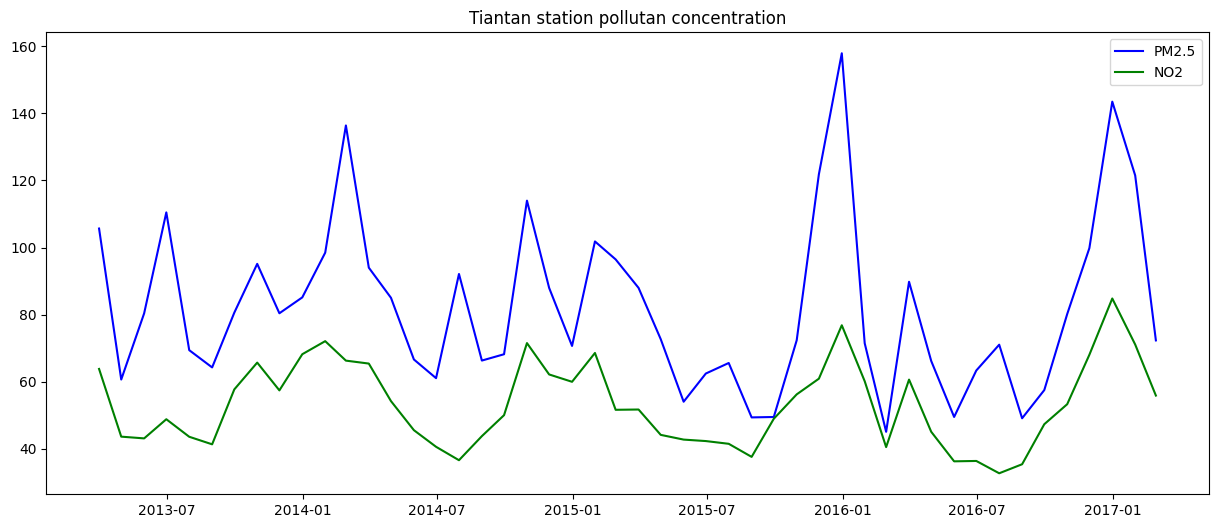

In [48]:
# sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(time_series_df.index, time_series_df["PM2.5"], linewidth=1.5, color="blue", label="PM2.5")
plt.plot(time_series_df.index, time_series_df["NO2"], linewidth=1.5, color="green", label="NO2")
plt.title("Tiantan station pollutan concentration")
plt.legend()
plt.show()

In [49]:
time_series_df.corr()

,PM2.5,NO2,WSPM
PM2.5,1.000000,0.795282,-0.255126
NO2,0.795282,1.000000,-0.178744
WSPM,-0.255126,-0.178744,1.000000


### Pertanyaan 2: Apakah ada hubungan antara konsentrasi polutan dan arah dan kecepatan angin?

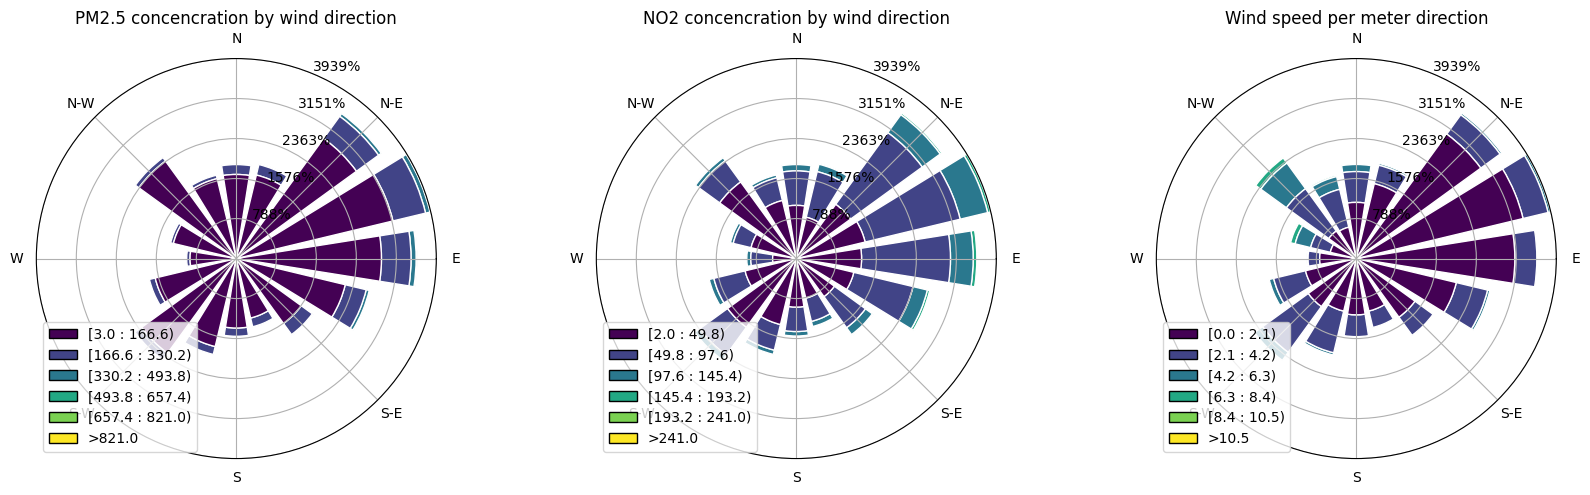

In [50]:
fig = plt.figure(figsize=(14,10))

fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)

rect=[0.1,0,0.4,0.4]
wa=WindroseAxes(fig, rect)
fig.add_axes(wa)
wa.bar(tiantan_df['wda'], tiantan_df['PM2.5'], normed=True, opening=0.8, edgecolor='white')
wa.yaxis.set_major_formatter(yticks)
wa.set_title("PM2.5 concencration by wind direction")
wa.legend()

rect=[0.5,0,0.4,0.4]
wa1=WindroseAxes(fig, rect)
fig.add_axes(wa1)
wa1.bar(tiantan_df['wda'], tiantan_df['NO2'], normed=True, opening=0.8, edgecolor='white')
wa1.yaxis.set_major_formatter(yticks)
wa1.set_title("NO2 concencration by wind direction")
wa1.legend()

rect=[0.9,0,0.4,0.4]
wa2=WindroseAxes(fig, rect)
fig.add_axes(wa2)
wa2.bar(tiantan_df['wda'], tiantan_df['WSPM'], normed=True, opening=0.8, edgecolor='white')
wa2.yaxis.set_major_formatter(yticks)
wa2.set_title("Wind speed per meter direction")
wa2.legend()

plt.show()

## Konklusi

### Konklusi pertanyaan 1

- Terdapat beberapa peningkatan konsentrasi polutan signifikan selama di musim dingin. Nilai polutan PM2.5 dan NO2 memiliki korelasi positif yang dapat berarti polutan bersumber dari sumber yang sama. Lalu terdapat korelasi negatif antara polutan dan kecepatan angin yang masuk akal dikarenakan semakin kecepatan angin dapat mengurangi konsentrasi polutan di udara, namun nilai korelasi menunjukan nilai yang kecil yang dapat berarti bahwa konsentrasi polutan bisa jadi disebabkan oleh faktor lain.

### Konklusi pertanyaan 2

- *Dari* hasil visualisasi dapat dilihat bahwa arah angin condong mengarah ke timur laut (NE) dan timur (E). tampak juga konsentrasi polutan terlihat lebih tinggi pada arah angin tersebut meski kecepatan angin nampaknya tidak terlalu berpengaruh seperti yang dijelaskan pada konklusi pertanyaan 1